In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [43]:
df = pd.read_csv(r"E:\Mis Carpetas\Documentos\Data Science\cyberbullying_tweets.csv")

In [44]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [45]:
df.shape

(47692, 2)

In [46]:
df1 = df[df['cyberbullying_type']=='religion'].sample(1000).copy()
df2 = df[df['cyberbullying_type']=='age'].sample(1000).copy()
df3 = df[df['cyberbullying_type']=='gender'].sample(1000).copy()
df4 = df[df['cyberbullying_type']=='ethnicity'].sample(1000).copy()
df5 = df[df['cyberbullying_type']=='not_cyberbullying'].sample(1000).copy()
df6 = df[df['cyberbullying_type']=='other_cyberbullying'].sample(1000).copy()

In [47]:
datos = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

In [48]:
'amp' in df['tweet_text']

False

In [49]:
datos.shape

(6000, 2)

In [50]:
datos.head()

,tweet_text,cyberbullying_type
16311,@zh_ha89 Islam treats women like slaves and an...,religion
16856,Palestine was stolen in 1948 by the Radical Ar...,religion
22328,https://www.timesnownews.com/amp/india/article...,religion
17829,No...Did I say I support radical people? No I ...,religion
19928,3. She said “because we are a Christian minist...,religion


In [51]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

<AxesSubplot:xlabel='cyberbullying_type', ylabel='count'>

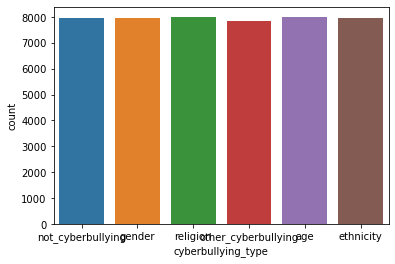

In [52]:
sns.countplot(data= df, x="cyberbullying_type")

In [53]:
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

In [54]:
%matplotlib inline
def cloud(datos,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(datos)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

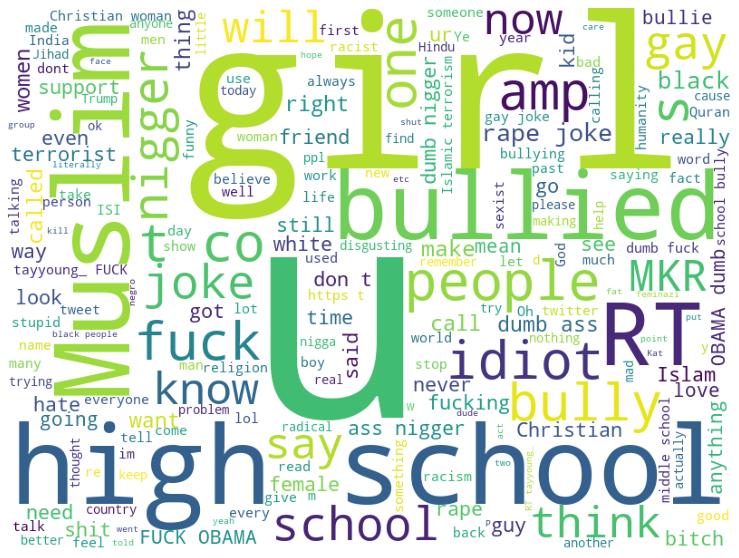

In [55]:
cloud(' '.join(datos['tweet_text']))

In [56]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [57]:
def clean_text(text):
    text_limpio=[]
    for token in nlp(text):
        if not token.is_punct and not token.is_stop:
            text_limpio.append(token.text.lower())
            
    return " ".join(text_limpio)

In [58]:
datos["tweet_text"] = datos["tweet_text"].apply(clean_text)

In [59]:
from sklearn.model_selection import train_test_split

y = datos["cyberbullying_type"]
X = datos.drop(columns="cyberbullying_type",axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
y

16311               religion
16856               religion
22328               religion
17829               religion
19928               religion
                ...         
25835    other_cyberbullying
25486    other_cyberbullying
28527    other_cyberbullying
29396    other_cyberbullying
27849    other_cyberbullying
Name: cyberbullying_type, Length: 6000, dtype: object

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
cv = CountVectorizer()

cv.fit(X_train["tweet_text"])

vec_x_train = cv.transform(X_train["tweet_text"])

In [63]:
vec_x_train

<4800x14154 sparse matrix of type '<class 'numpy.int64'>'
	with 56335 stored elements in Compressed Sparse Row format>

In [64]:
cv.vocabulary_

{'fuck': 5058,
 'er': 4303,
 'rule': 10841,
 'nigger': 8724,
 'dumb': 4003,
 'ass': 1131,
 'niggers': 8728,
 'find': 4784,
 'interesting': 6435,
 'practicing': 9747,
 'christians': 2509,
 'support': 12181,
 'un': 13118,
 'globalist': 5337,
 'radical': 10176,
 'islam': 6528,
 'christianity': 2506,
 'antithesis': 944,
 'know': 7136,
 'tweets': 13011,
 'went': 13640,
 'viral': 13422,
 'like': 7472,
 'lol': 7591,
 'girls': 5306,
 'bullied': 2048,
 'high': 5838,
 'school': 11061,
 'nurses': 8860,
 'probably': 9868,
 'talking': 12329,
 'cheesy': 2438,
 'movie': 8387,
 'au': 1214,
 'hawks': 5731,
 'getting': 5270,
 'dabi': 3269,
 'hottie': 5992,
 'girl': 5300,
 'running': 10851,
 'actually': 522,
 'glancing': 5324,
 'nerdy': 8655,
 'kid': 7052,
 'bruises': 1991,
 'face': 4530,
 'day': 3363,
 'saves': 11023,
 'bully': 2053,
 'rt': 10824,
 'kyle_crilly92': 7197,
 'yesyouresexist': 14015,
 'upset': 13234,
 'cause': 2285,
 'got': 5412,
 'dick': 3641,
 'replied': 10525,
 'continued': 2926,
 'conve

In [65]:
cv.fit(X_test["tweet_text"])

vec_y_test = cv.transform(X_test["tweet_text"])

In [66]:
cv.vocabulary_

{'guess': 2121,
 'happened': 2172,
 'mkr': 3224,
 'competition': 1059,
 'running': 4206,
 'eternity': 1666,
 'god': 2045,
 'kat': 2735,
 'awful': 477,
 'person': 3678,
 'oh': 3498,
 'humiliated': 2356,
 'good': 2054,
 'psa': 3907,
 'im': 2429,
 'bully': 771,
 'said': 4226,
 'muslim': 3308,
 'community': 1052,
 'specific': 4592,
 'names': 3329,
 'blaming': 641,
 'people': 3667,
 'like': 2929,
 'want': 5251,
 'communities': 1051,
 'fight': 1830,
 'die': 1401,
 'build': 759,
 'illusion': 2427,
 'islamophobia': 2568,
 'brainwash': 704,
 'incite': 2457,
 'idiots': 2406,
 'cops': 1135,
 'harrass': 2190,
 'stalk': 4621,
 '13yo': 22,
 'trying': 5044,
 'school': 4280,
 'project': 3871,
 'girl': 2029,
 'bullied': 765,
 'high': 2255,
 'laker': 2846,
 'life': 2924,
 'sucks': 4716,
 'contrarians': 1116,
 'rhys': 4135,
 'muldoon': 3297,
 'bit': 623,
 'opinionated': 3534,
 'boy': 699,
 'mrplc': 3286,
 'lie': 2922,
 'oath': 3464,
 'word': 5356,
 'nigger': 3397,
 'hippy': 2271,
 'chick': 923,
 'intervi

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)

from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tfi = TfidfVectorizer()

tfi.fit(X_train["tweet_text"])


TfidfVectorizer()

In [69]:
vec_x_train = tfi.transform(X_train["tweet_text"])



In [70]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

param ={"kernel": ['linear'],
        "C": [0.01, 0.10, 1.00, 10.00]
        }

gridsearch = GridSearchCV(estimator= svc, 
                          param_grid= param, 
                          scoring = "accuracy",
                          cv=5, 
                          return_train_score=True)

gridsearch.fit(vec_x_train,y_train)


Wall time: 3min 2s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'kernel': ['linear']},
             return_train_score=True, scoring='accuracy')

In [71]:
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.8075000000000001
{'C': 1.0, 'kernel': 'linear'}


In [72]:
vec_x_test = tfi.transform(X_test["tweet_text"])

In [73]:
svc1 = SVC(C=1, kernel='linear')

svc1.fit(vec_x_train, y_train)

y_test_pred = svc1.predict(vec_x_test)
y_train_pred = svc1.predict(vec_x_train)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accurace_svc1_train = accuracy_score(y_train, y_train_pred)

accurace_svc1_test = accuracy_score(y_test, y_test_pred)

In [76]:
print(accurace_svc1_train)
print(accurace_svc1_test)

0.97625
0.8066666666666666


In [77]:
dfreg = pd.DataFrame(gridsearch.cv_results_)
dfreg = dfreg.sort_values("rank_test_score")
dfreg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,4.676349,0.109263,0.539516,0.139031,1.0,linear,"{'C': 1.0, 'kernel': 'linear'}",0.803125,0.798958,0.804167,0.825000,0.806250,0.807500,0.009067,1,0.983333,0.982031,0.978646,0.980208,0.979948,0.980833,0.001652
3,4.869702,0.020911,0.630303,0.100177,10.0,linear,"{'C': 10.0, 'kernel': 'linear'}",0.791667,0.796875,0.792708,0.809375,0.794792,0.797083,0.006401,2,0.998437,0.997135,0.996875,0.996615,0.996615,0.997135,0.000679
1,4.995397,0.376007,0.864212,0.010631,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.670833,0.659375,0.657292,0.656250,0.647917,0.658333,0.007366,3,0.697396,0.696615,0.692969,0.685417,0.694010,0.693281,0.004255
0,6.197013,0.384458,0.779827,0.192911,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.283333,0.281250,0.286458,0.277083,0.275000,0.280625,0.004146,4,0.274219,0.286198,0.297917,0.278385,0.276562,0.282656,0.008625
